# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/hildavargas/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


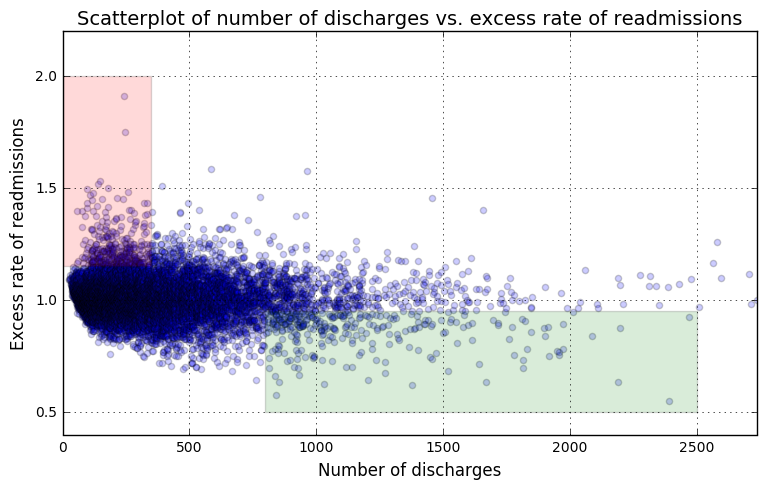

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
Based off of the observations, specifically those in the green area, I feel comfortable agreeing with the statement that the rate of readmissions is trending down with increasing number of discharges. There are some hospitals with high numbers of discharges and high excess rates of readmission, but they could be outliers. 

I also agree that there is a greater incidence of excess rate of readmissions with lower numbers of discharges because we can see this through the dense blue area representing hospitals with 0-1000 discharges. As the number of discharges increases, it appears that the excess rate of readmissions decreases, so I agree with the third statement in part A as well.

I agree that in hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023, but I disagree that 63% have excess readmission rates greater than 1. According to my calculations, 59% have excess readmission rates greather than 1.

I concur with the statement that in hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

While it seems there is a significant correlation between hospital capacity and readmission rates when looking at the graph, I think that we cannot be confident in this statement without a hypothesis test or linear regression model. There are so many observations that simpy looking at a graph does not suffice. Similarly, while it may be true that smaller hospitals may be lacking the necessary resources to ensure quality care and prevent readmissions, we cannot be certain without looking at other variables such as the age of the patient, whether or not the patient has a chronic disease, the amount of funding that the hospital receives, and the number of people that the facility serves in its community.

I think that the policy recommendations are robust, but I don't know enough about how hospitals are funded to agree that small hosptals should upgrade the allocation of their resources in order to continue operation. It does sound like a fair suggestion, but first I think that it's important to test whether or not the hospital size has a significant influence on the rates of readmission. 

In [13]:
# Verify statistics claims for hospitals with <100 discharges
df=clean_hospital_read_df 
less_100=df[df['Number of Discharges']<100]
np.mean(less_100['Excess Readmission Ratio'])

1.0226183501683506

In [34]:
less_100[less_100['Excess Readmission Ratio']>1].count()
high_ratio_100=751
less_100.count()
less_100_hospitals=1269
high_ratio_100/less_100_hospitals

0.5918045705279747

In [29]:
# Verify statistics claims for hospitals with >1000 discharges
more_1000=df[df['Number of Discharges']>1000]
np.mean(more_1000['Excess Readmission Ratio'])

0.9783354211663071

In [35]:
more_1000[more_1000['Excess Readmission Ratio']>1].count()
high_ratio_1000=206
more_1000.count()
more_1000_hospitals=463
high_ratio_1000/more_1000_hospitals

0.4449244060475162

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   * Setup an appropriate hypothesis test.
   * Compute and report the observed significance value (or p-value).
   * Report statistical significance for α = .01.
   * Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   * Look at the scatterplot above.
       * What are the advantages and disadvantages of using this plot to convey information?
       * Construct another plot that conveys the same information in a more direct manner.


H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub>

H<sub>A</sub>: $\mu$<sub>1</sub> > $\mu$<sub>2</sub>

$\alpha$ = 0.01

where $\mu$<sub>1</sub> = readmission rates of hospitals with less than 300 discharges and $\mu$<sub>2</sub> = readmission rates of hospitals with 300 or more discharges

In [69]:
less_300=df[df['Number of Discharges']<300]
mean_less_300=np.mean(less_300['Excess Readmission Ratio'])
mean_less_300

1.0142382121807445

In [70]:
more_300=df[df['Number of Discharges']>=300]
mean_more_300=np.mean(more_300['Excess Readmission Ratio'])
mean_more_300

0.9998708480237513

In [72]:
samp_diff=mean_less_300-mean_more_300
samp_diff

0.014367364156993245

In [61]:
# Calculate the standard deviation of the sampling distributions
less_300_std=np.std(less_300['Excess Readmission Ratio'])
less_300_std

0.08247145651495595

In [62]:
less_300.count()

Hospital Name                 6189
Provider Number               6189
State                         6189
Measure Name                  6189
Number of Discharges          6189
Footnote                        81
Excess Readmission Ratio      6108
Predicted Readmission Rate    6108
Expected Readmission Rate     6108
Number of Readmissions        6108
Start Date                    6189
End Date                      6189
dtype: int64

In [63]:
more_300.count()

Hospital Name                 5389
Provider Number               5389
State                         5389
Measure Name                  5389
Number of Discharges          5389
Footnote                         0
Excess Readmission Ratio      5389
Predicted Readmission Rate    5389
Expected Readmission Rate     5389
Number of Readmissions        5389
Start Date                    5389
End Date                      5389
dtype: int64

In [60]:
more_300_std=np.std(more_300['Excess Readmission Ratio'])
more_300_std

0.1011088761383622

In [66]:
a=(less_300_std**2)/6189
b=(more_300_std**2)/5389
samp_std=np.sqrt(a+b)
samp_std

0.0017308916442753813

In [67]:
# Calculate critical z-score at 99% level
samp_std*2.326

0.0040260539645845372

In [73]:
samp_diff

0.014367364156993245

So, the difference in the means of the two sample groups is 0.014, which is more extreme than the critical z-score, we must reject the hypothesis in favor of the alternative one. That is, we can say with 99% confidence that the mean of excess readmission ratios for hospitals with less than 300 discharges is greater than that of hospitals with 300 or more discharges.

With regards to statistical vs. practical significance, I think that the even a very small difference in the means of the readmission ratios can still be considered significant if it is not due to random chance. In this case, the difference between the ratios two samples was .014, which may not be practically significant because it is such a small number. Because it is small, I would suggest that the hospitals focus on other ways of decreasing their readmission ratios that aren't related to size or discharges like allocation of resources or providing better resources to some of their older patients with chronic issues, for example. 

The plot above is beneficial to the reader because its colors aren't too hectic or hard to see, and it allows one to interpret the trends between the two variables. However, for discharges between 0-1000, it is very hard to see the differences in the ratios because there are so many observations on top of each other and the graph is relatively small, making the data very dense and difficult for making conclusions. I would increase the values on the x- and y- axes spread out the observations as much as possible. Finally, I would add a line where the ratio of readmissions = 1 to provide a better representation of how many hospitals have a high ratio.

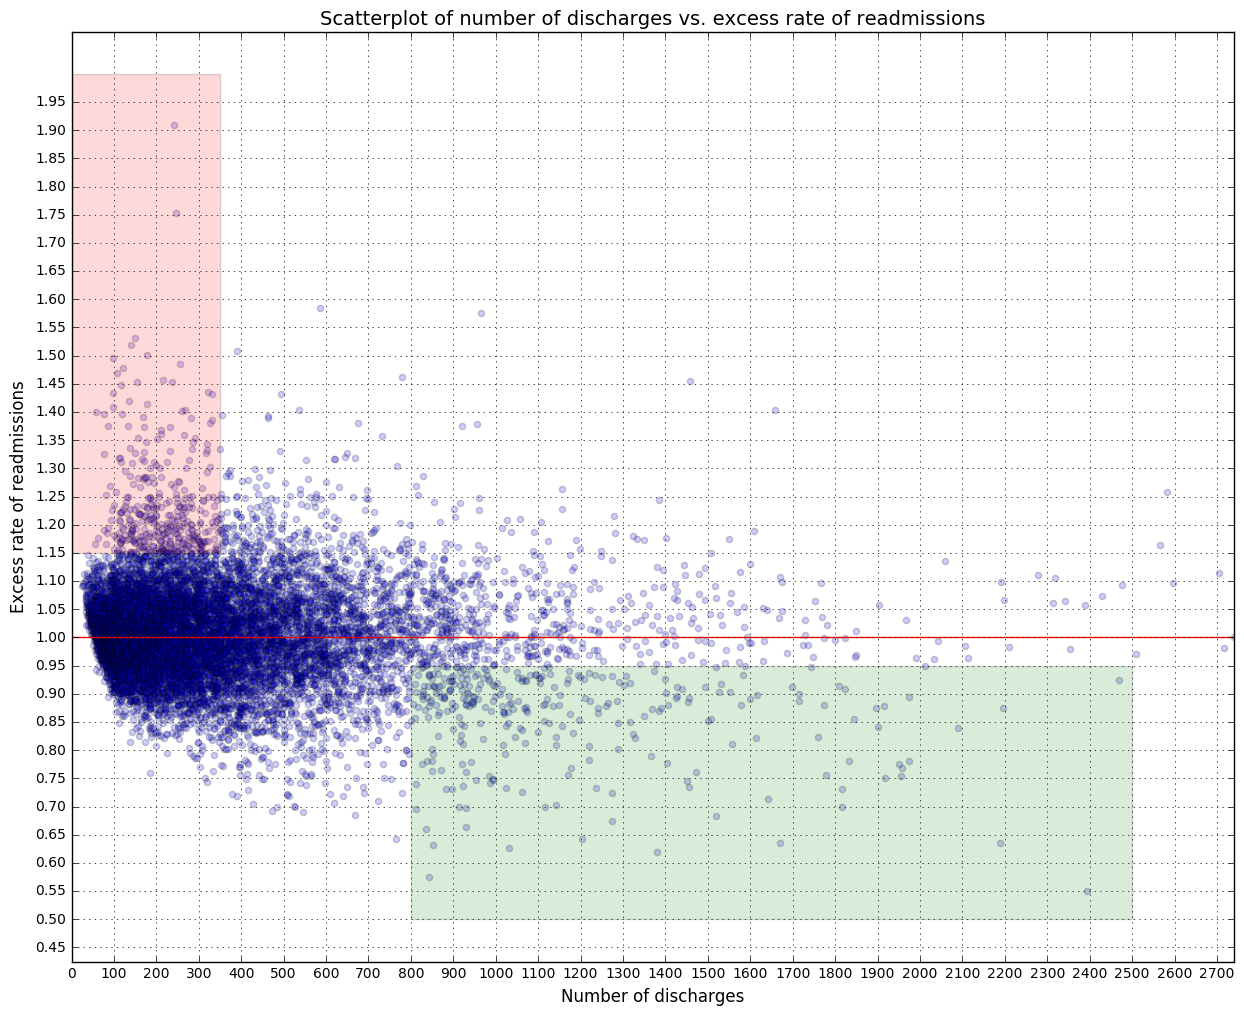

In [111]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
plt.xticks(np.arange(0, 2800, 100))
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.yticks(np.arange(0, 2, .05))
plt.plot((0, 2800), (1, 1), 'r-', )
ax.grid(True)